In [1]:
"""
Created on Fri Apr 9 15:21:04 2021

@author: lixiangk
"""

#from .universal import *
#from .interface.postG4 import *
from interface import *
from IPython import display

In C:\Users\lixiangk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lixiangk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\lixiangk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\lixiangk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor 

# Load the output

.out


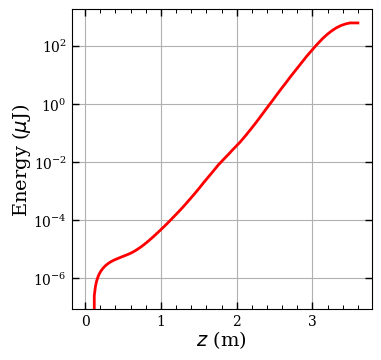

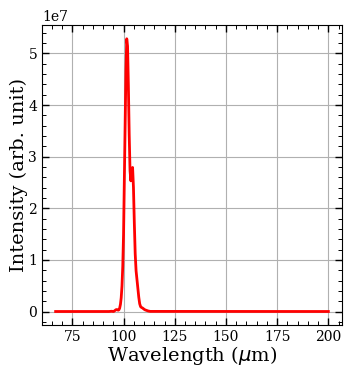

In [4]:
workdir = r'\\afs\ifh.de\group\pitz\data\lixiangk\sim\2020\Genesis-demo\version2'
os.chdir(workdir)

# version 2
fname = 'pithz.1.out'
pg = PostGenesis(fname, debug = 1)

.h5


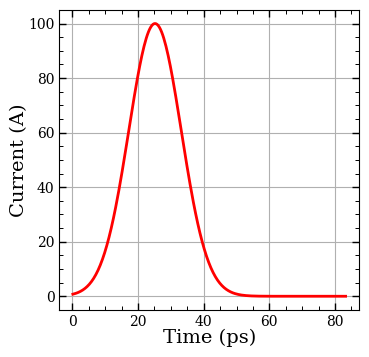

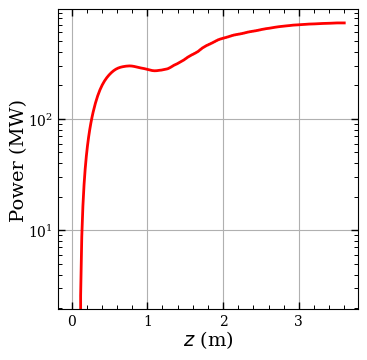

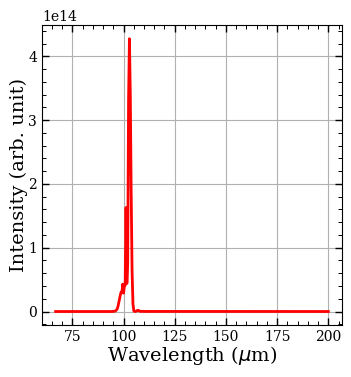

In [8]:
workdir = r'\\afs\ifh.de\group\pitz\data\lixiangk\sim\2020\Genesis-demo\test_mod'
#workdir = r'\\afs\ifh.de\group\pitz\data\Georgiev\sim\GENESIS4\SCAN'
os.chdir(workdir)

# version 4
fname = 'test2.out.h5'
pg = PostGenesis(fname, debug = 1, fig_ext = '@cut_0.5.png')#, harmonic = 1)

# print(pg.file.get('Global').keys())
# for key in pg.file.get('Global').keys():
#     print(pg.file.get('Global').get(key)[:])

.h5


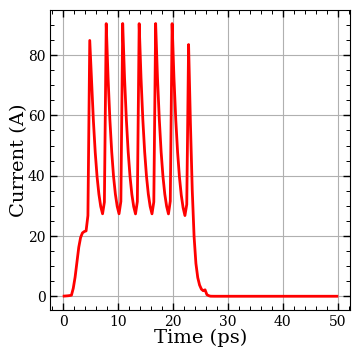

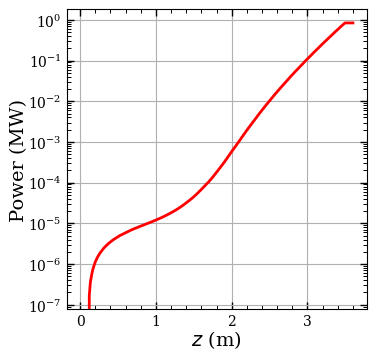

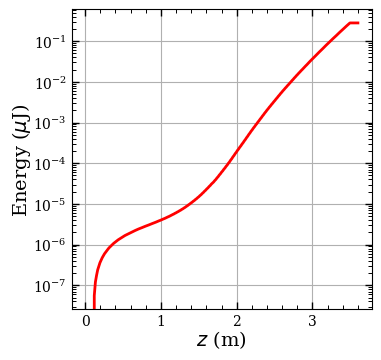

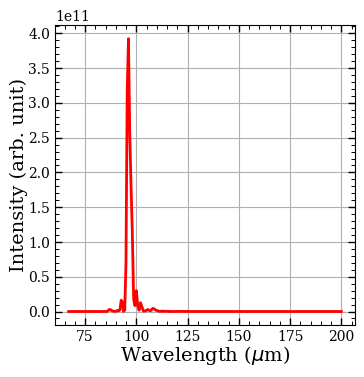

In [10]:
workdir = r'\\afs\ifh.de\group\pitz\data\lixiangk\sim\2020\Genesis-demo\ParaScan'
os.chdir(workdir)

# version 4
fname = 'modulated.21.out.h5'
pg = PostGenesis(fname, debug = 1)

# print(pg.file.keys())
# prop = 'Meta'
# print(pg.file.get(prop).keys())
# for key in pg.file.get(prop).keys():
#     print(pg.file.get(prop).get(key)[:])

In [84]:
print(pg.file.keys())
print(pg.file.get('Global').get('slen')[0])

<KeysViewHDF5 ['Beam', 'Field', 'Global', 'Lattice', 'Meta']>
0.015000000000000001


In [97]:
pg.zplot[:]

array([0.   , 0.005])

8192 [32.69262175 32.69262175 32.69262175 32.69262175 32.74851384 32.74851384
 32.74851384 32.74851384 32.77453984 32.77453984 32.77453984 32.77453984]


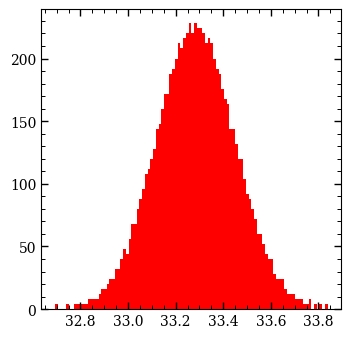

In [42]:
temp = h5py.File('test.0.par.h5', 'r')
gamma = temp.get('slice000040/gamma')[:]; print(len(gamma), np.sort(gamma)[0:12])
_ = plt.hist(gamma, 100)

# Visualize the output
## Animate: the radiation profile along the undulator

In [4]:
zplot = pg.zplot
n
temp = pg.get_fielddata('power')/1e6
ppower = np.max(temp, axis = 1) # peak power
ymax = np.max(temp)/1e6

fig = plt.figure()
ax1 = fig.add_subplot(5, 1, (1, 3))
ax2 = fig.add_subplot(3, 1, 3)

step = 5
for i in np.arange(0, temp.shape[0], step):
    
    ax1.plot(temp[i], '-')

    ax1.set_title('z = : %.3f m' % zplot[i])
    ax1.set_xlabel('# of slice')
    ax1.set_ylabel('Power (MW)')
    #ax.set_ylim(0, ymax)
    ax1.grid()
    
    ax2.plot(zplot[:i], ppower[:i], '-')
    ax2.set_xlabel(r'$z$ (m)')
    ax2.set_ylabel(r'Peak power (MW)')
    ax2.grid()
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    #plt.pause(0.1)
    if i<temp.shape[0]-step:
        ax1.cla()
        ax2.cla()

## Animate: the bunching factor along the undulator

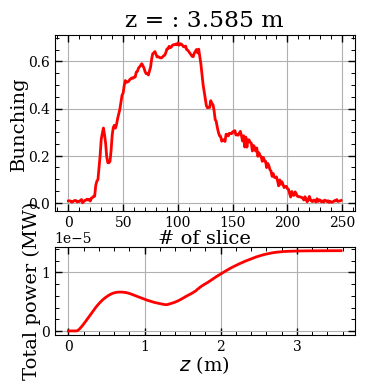

In [16]:
zplot = pg.zplot

temp = pg.get_fielddata('power')/1e6
ppower = np.max(temp, axis = 1) # peak power

temp = pg.get_beamdata('bunching')
ymax = np.max(temp)

fig = plt.figure()
ax1 = fig.add_subplot(5, 1, (1, 3))
ax2 = fig.add_subplot(3, 1, 3)

step = 5
for i in np.arange(0, temp.shape[0], step):
    ax1.plot(temp[i], '-')
    
    ax1.set_title('z = : %.3f m' % zplot[i])
    ax1.set_xlabel('# of slice')
    ax1.set_ylabel('Bunching')
    #ax.set_ylim(0, ymax)
    ax1.grid()
    
    ax2.plot(zplot[:i], ppower[:i]/1e6, '-')
    ax2.set_xlabel(r'$z$ (m)')
    ax2.set_ylabel(r'Total power (MW)')
    ax2.grid()
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    #plt.pause(0.5)
    time.sleep(1)
    if i<temp.shape[0]-step:
        ax1.cla()
        ax2.cla()

## Plot: the bunching factor of signle slice along the undulator

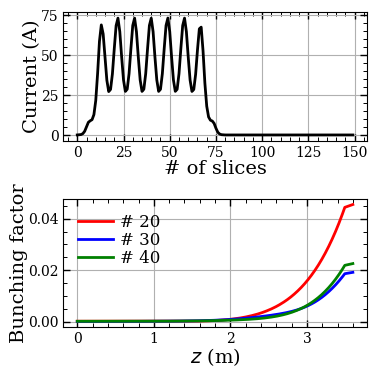

In [8]:
current = pg.current
zplot = pg.zplot

# print(pg.outputs) # check the name of the property of interest
temp = pg.get_beamdata('bunching')

fig, [ax1, ax2] = plt.subplots(nrows = 2)

ax1.plot(current, 'k-')
ax1.set_xlabel(r'# of slices')
ax1.set_ylabel(r'Current (A)')
ax1.grid()

slices = [20, 30, 40]
for i in slices:
    ax2.plot(zplot, temp[:,i], '-')

ax2.set_xlabel(r'$z$ (m)')
ax2.set_ylabel(r'Bunching factor')
ax2.legend(['# %d' % i for i in slices])
ax2.grid()

fig.tight_layout()
#fig.savefig('bunching-factor.eps')

## Plot: the radiation size along the undulator

Text(0, 0.5, 'Radiation trans. size (mm)')

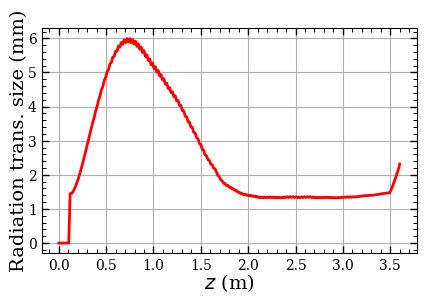

In [10]:
zplot = pg.zplot
current = pg.current

name = 'r_size' # version 2
name = 'xsize' # or 'ysize' for version 3
r_size = (pg.get_fielddata(name) @ current)/np.sum(current)

fig, ax = plt.subplots(figsize = (5, 3))

ax.plot(zplot, r_size*1e3, 'r-')
ax.grid()

ax.set_xlabel(r'$z$ (m)')
ax.set_ylabel(r'Radiation trans. size (mm)')

## Plot: electon beam size along the undulator

In [14]:
x = pg.zplot
current = pg.current

# version 2
#xrms = (pg.get_fielddata('xrms') @ current)/np.sum(current)
#yrms = (pg.get_fielddata('yrms') @ current)/np.sum(current)

# version 4
xrms = (pg.get_data('Beam', 'xsize') @ current)/np.sum(current)
yrms = (pg.get_data('Beam', 'ysize') @ current)/np.sum(current)
                   
fig, ax = plt.subplots(figsize = (5, 3))

ax.plot(x, xrms*1e3, 'r-')
ax.plot(x, yrms*1e3, 'b-')
ax.grid()

ax.set_xlabel(r'$z$ (m)')
ax.set_ylabel(r'RMS size (mm)')
ax.legend([r'$x$', r'$y$'])

# Batch process outputs of parameter scan
---
For example, random seed scan

## Write important results vs scan into seperate files 

In [67]:
workdir = r'\\afs\ifh.de\group\pitz\data\lixiangk\sim\2020\Genesis-demo\ParaScan'
os.chdir(workdir)

ext = '_test'
for i in np.arange(1, 11):
    try:
        ipseed = i+0; print(ipseed, end = ' ')
        fname = 'modulated.%d.out.h5' % ipseed
        # fname = 'pithz.%dA.%.1fps.%03d.out' % (Ipeak, FWHM, ipseed)
        
        pg = PostGenesis(fname)

        zplot = pg.zplot
        zpower = pg.zpower
        zenergy = pg.zenergy
        
        ppower = np.max(pg.get_fielddata('power'), axis = 1)
        
        tt = pg.zbunch/g_c
        tspec = pg.get_fielddata('power', at = 3.6)
        ww, fspec = pg.get_spectrum(at = 3.6)

        if i == 1:
            with open('./power-z-ipseed'+ext+'.txt', 'w') as f_handle:
                np.savetxt(f_handle,np.atleast_2d(zplot),fmt='%15.6E')
            with open('./energy-z-ipseed'+ext+'.txt', 'w') as f_handle:
                np.savetxt(f_handle,np.atleast_2d(zplot),fmt='%15.6E')
            with open('./peak-power-z-ipseed'+ext+'.txt', 'w') as f_handle:
                np.savetxt(f_handle,np.atleast_2d(zplot),fmt='%15.6E')
                
            with open('./spectrum-lamds-ipseed'+ext+'.txt', 'w') as f_handle:
                np.savetxt(f_handle,np.atleast_2d(ww),fmt='%15.6E')
            with open('./power-t-ipseed'+ext+'.txt', 'w') as f_handle:
                np.savetxt(f_handle,np.atleast_2d(tt),fmt='%15.6E')
            
        with open('./power-z-ipseed'+ext+'.txt', 'a') as f_handle:
            np.savetxt(f_handle,np.atleast_2d(zpower),fmt='%15.6E')
        with open('./energy-z-ipseed'+ext+'.txt', 'a') as f_handle:
            np.savetxt(f_handle,np.atleast_2d(zenergy),fmt='%15.6E')
        with open('./peak-power-z-ipseed'+ext+'.txt', 'a') as f_handle:
            np.savetxt(f_handle,np.atleast_2d(ppower),fmt='%15.6E')
            
        with open('./spectrum-lamds-ipseed'+ext+'.txt', 'a') as f_handle:
            np.savetxt(f_handle,np.atleast_2d(fspec),fmt='%15.6E')
        with open('./power-t-ipseed'+ext+'.txt', 'a') as f_handle:
            np.savetxt(f_handle,np.atleast_2d(tspec),fmt='%15.6E')
    except Exception as err:
        print(err)
        print('Error got at: ', i, )
        pass
print('\n')

1 .h5
2 .h5
3 .h5
4 .h5
5 .h5
6 .h5
7 .h5
8 .h5
9 .h5
10 .h5




## Plot: energy and peak power along z

(269, 11)
(269, 11)
P =: 0.03 +/- 0.01 MW
E =: 0.24 +/- 0.12 uJ

1 2 3 4 5 6 7 8 9 

C:\Users\lixiangk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later


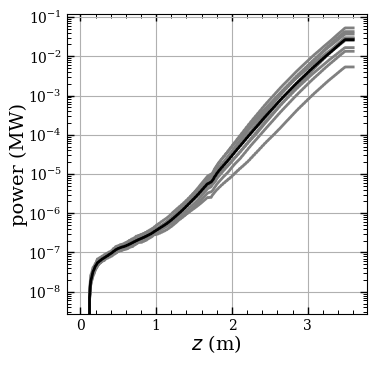

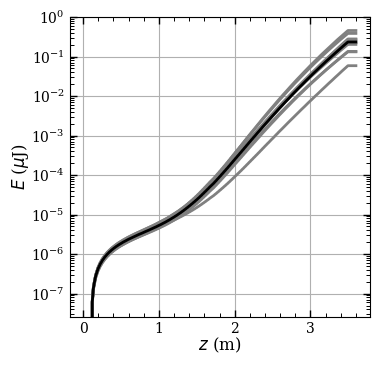

In [68]:
ext = '_test'
pp = np.loadtxt('peak-power-z-ipseed'+ext+'.txt'); pp = pp.T; print (pp.shape)
EE = np.loadtxt('energy-z-ipseed'+ext+'.txt'); EE = EE.T; print (EE.shape)

end = pp.shape[1]
end = 10

output = f'P =: {np.mean(pp[-1,1:end])/1e6:.2f} +/- {np.std(pp[-1,1:end])/1e6:.2f} MW\n'
output += f'E =: {np.mean(EE[-1,1:end])*1e6:.2f} +/- {np.std(EE[-1,1:end])*1e6:.2f} uJ\n'
print(output)

with open('stat'+ext+'.dat', 'w') as f_handle:
    f_handle.write(output)

fig, ax1 = plt.subplots(figsize = (4, 4))
for i in np.arange(1, end):
    ax1.plot(pp[:,0], pp[:,i]/1e6, '-', color='grey') # energy: MW
ax1.plot(pp[:,0], np.mean(pp[:,1:], 1)/1e6, 'k-')

ax1.set_xlabel(r'$z$ (m)')
ax1.set_ylabel(r'power (MW)')
ax1.set_yscale('log')
ax1.grid()
fig.savefig('ppower-vs-z-ipseed'+ext+'.png')

fig, ax2 = plt.subplots(figsize = (4, 4))
for i in np.arange(1, end):
    print(i, end = ' ')
    ax2.plot(EE[:,0], EE[:,i]*1e6, '-', color='grey') # energy: uJ
ax2.plot(EE[:,0], np.mean(EE[:,1:], 1)*1e6, 'k-')
#res.append(EE[:,0])
#res.append(np.mean(EE[:,1:], 1))

ax2.set_xlabel(r'$z$ (m)', fontsize = 12)
ax2.set_ylabel(r'$E$ ($\mu$J)', fontsize = 12)
ax2.set_yscale('log')
#ax2.set_ylim(0, 150)
#ax2.set_yticks([1e-7, 1e-6, 1e-6, 1e])
ax2.grid()

#locmin = mpl.ticker.LogLocator(base = 10.0, subs = (0.2, 0.4, 0.6, 0.8), numticks = 12)
#ax2.yaxis.set_minor_locator(locmin)
#ax2.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

#ax2.text(0.925, 0.95, '($b$)', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

fig.savefig('energy-vs-z-ipseed'+ext+'.png', density = 300)

## Plot: spectrum and waveform profile

(150, 11)
(150, 11)
Centre wavelength: 97.14 +/- 0.48 um
Spectrum width: 2.70 +/- 0.36 um
Arrival time jitter: -3.16 +/- 1.99 ps



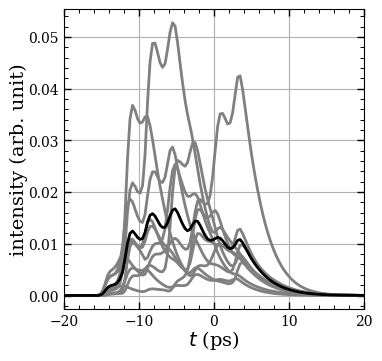

In [71]:
ext = '_test'
ss = np.loadtxt('spectrum-lamds-ipseed'+ext+'.txt'); ss = ss.T; print (ss.shape)
pp = np.loadtxt('power-t-ipseed'+ext+'.txt'); pp = pp.T; print (pp.shape)

end = ss.shape[1]

xlamds = []; width = []
fig, ax = plt.subplots(figsize = (4, 4))
for i in np.arange(1, end):
    ax.plot(ss[:,0]*1e6, ss[:,i]/1e8, '-', color='grey') # energy: MW
    xlamds.append([weighted_mean(ss[:,0], ss[:,i])*1e6])
    width.append([weighted_std(ss[:,0], ss[:,i])*1e6])
ax.plot(ss[:,0]*1e6, np.mean(ss[:,1:], 1)/1e8, 'k-')

output =  f'Centre wavelength: {np.mean(xlamds):.2f} +/- {np.std(xlamds):.2f} um\n'
output += f'Spectrum width: {np.mean(width):.2f} +/- {np.std(width):.2f} um\n'

ax.set_xlabel(r'$\lambda_s$ ($\mu$m)', fontsize = 12)
ax.set_ylabel(r'intensity (arb. unit)', fontsize = 12)
#ax.set_yscale('log')
ax.set_xlim(80, 120)
#ax.set_ylim(-0.05, 1.1)
ax.grid()

#ax.text(0.925, 0.95, '($b$)', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
fig.savefig('spectrum-vs-lamds-ipseed'+ext+'.png')


jitter = []
fig, ax = plt.subplots()
for i in np.arange(1, end):
    ax.plot(pp[:,0]*1e12-20, pp[:,i]/1e6, '-', color='grey') # energy: MW
    jitter.append([weighted_mean(pp[:,0], pp[:,i])*1e12-20])
ax.plot(pp[:,0]*1e12-20, np.mean(pp[:,1:], 1)/1e6, 'k-')

output += f'Arrival time jitter: {np.mean(jitter):.2f} +/- {np.std(jitter):.2f} ps\n'
print(output)

with open('stat'+ext+'.dat', 'a') as f_handle:
    f_handle.write(output)

ax.set_xlabel(r'$t$ (ps)')
ax.set_ylabel(r'intensity (arb. unit)')
#ax.set_yscale('log')
ax.set_xlim(-20, 20)
#ax.set_ylim(-0.005, 0.6)
ax.grid()
fig.savefig('power-vs-t-ipseed'+ext+'.png')